<a href="https://colab.research.google.com/github/wkalies/MDS_2024/blob/main/Session1/3-Python-roadmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Other machine learning libraries and good things to know

## An overview

![map](https://miro.medium.com/max/1400/1*N3oBASDtXTgpGLJkeO9v8w.jpeg)

https://medium.com/@BlueOrangeDigital/essential-python-libraries-for-machine-learning-projects-d5cef004cf60

## Markdown:  Not a Python library, but how you make pretty notebooks

https://daringfireball.net/projects/markdown/

> Markdown is a text-to-HTML conversion tool for web writers. Markdown allows you to write using an easy-to-read, easy-to-write plain text format, then convert it to structurally valid XHTML (or HTML).

> Thus, “Markdown” is two things: (1) a plain text formatting syntax; and (2) a software tool, written in Perl, that converts the plain text formatting to HTML. See the Syntax page for details pertaining to Markdown’s formatting syntax. You can try it out, right now, using the online Dingus.

### Getting started

https://wordpress.com/support/markdown-quick-reference/

https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax

### Latex too!

https://ashki23.github.io/markdown-latex.html



$$
A_{m,n} =
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n}
\end{pmatrix}
$$

## Numpy:  Making Python look like Matlab.   Matrices, vectors, and linear algebra, oh my!

> Using NumPy in Python gives functionality comparable to MATLAB since they are both interpreted,[20] and they both allow the user to write fast programs as long as most operations work on arrays or matrices instead of scalars.

https://numpy.org/doc/stable/index.html

https://numpy.org/doc/stable/user/quickstart.html

What we have seen already

In [ ]:
import numpy as np
# Generate data
number_of_points = 10
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [ ]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(x, y, deg=deg)
y_hat_function = np.poly1d(z)

## Matplotlib:  Plotting

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

> * Create publication quality plots.
* Make interactive figures that can zoom, pan, update.
* Customize visual style and layout.
* Export to many file formats .
* Embed in JupyterLab and Graphical  User Interfaces.
* Use a rich array of third-party packages built on Matplotlib.

https://matplotlib.org/stable/tutorials/introductory/usage.html

https://matplotlib.org/stable/tutorials/index

Even better... many, many examples!

https://matplotlib.org/stable/gallery/index.html

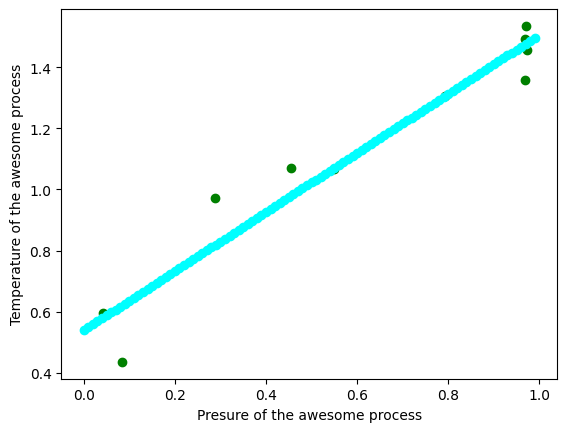

In [ ]:
import matplotlib.pylab as py
x_on_grid = np.arange(0,1,0.01)
y_predictions_on_grid = y_hat_function(x_on_grid)

py.scatter(x, y, color='green')
py.scatter(x_on_grid, y_predictions_on_grid, color='cyan')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## Pandas:  A great place to store your data.  Think Excel spreadsheet, but in Python

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/docs/index.html

https://pandas.pydata.org/docs/getting_started/index.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.DataFrame(data={'x':x, 'y':y})
data

,x,y
0,0.970990,1.535195
1,0.084055,0.435506
2,0.041369,0.595169
3,0.548538,1.065526
4,0.968010,1.357558
5,0.454984,1.071253
6,0.793951,1.304629
7,0.968299,1.491703
8,0.289031,0.971941
9,0.974077,1.455868


In [ ]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(data['x'], data['y'], deg=deg)
y_hat_function = np.poly1d(z)
data['y_hat'] = y_hat_function(data['x'])

Pandas makes visualization easy too!

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<Axes: xlabel='x', ylabel='y'>

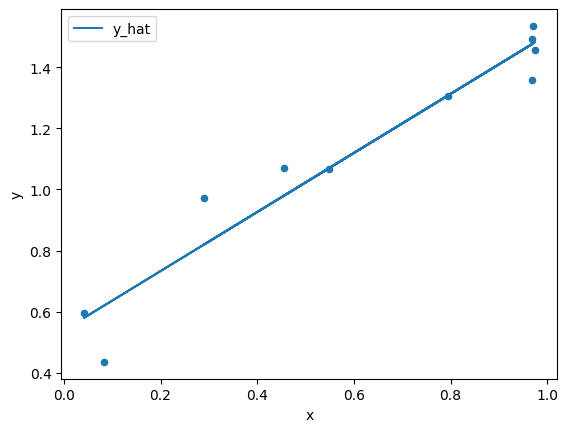

In [ ]:
ax = data.plot(x='x',y='y', kind='scatter')
data.plot(x='x',y='y_hat', kind='line', ax=ax)


## Stasmodels:  All the math!

> statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
results = smf.ols('y ~ x', data=data).fit()

What does all this mean?

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     113.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.25e-06
Time:                        16:20:15   Log-Likelihood:                 9.6806
No. Observations:                  10   AIC:                            -15.36
Df Residuals:                       8   BIC:                            -14.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5394      0.064      8.415      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


## Seaborn:  Classic statistical analysis made easy

https://seaborn.pydata.org/

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

> For a brief introduction to the ideas behind the library, you can read the introductory notes or the paper. Visit the installation page to see how you can download the package and get started with it. You can browse the example gallery to see some of the things that you can do with seaborn, and then check out the tutorial or API reference to find out how.

In [ ]:
import seaborn as sns

One command!

https://seaborn.pydata.org/tutorial/regression.html

<Axes: xlabel='x', ylabel='y'>

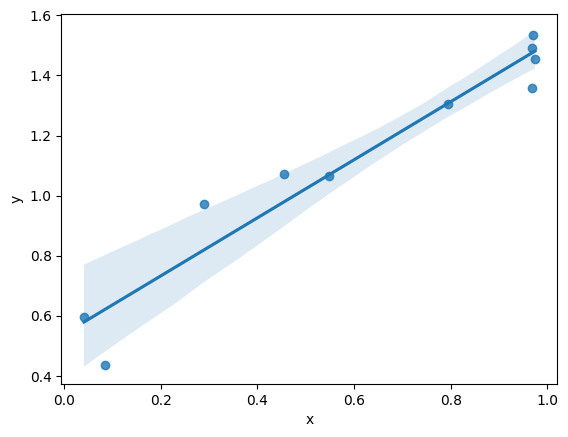

In [ ]:
sns.regplot(x="x", y="y", data=data)

What is that light blue area!?

## Scikit Learn:  Machine Learning made easy.



> Simple and efficient tools for predictive data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable - BSD license

![map](https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg)

https://scikit-learn.org/stable/

Again, many, many examples!

https://scikit-learn.org/stable/auto_examples/index.html

In [ ]:
# Generate data
number_of_points = 100
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [ ]:
from sklearn.linear_model import LinearRegression

# Make x into a 2D array
X = x.reshape(-1,1)
reg = LinearRegression().fit(X, y)


In [ ]:
reg.coef_


array([1.02787788])

In [ ]:
reg.intercept_


0.47740758971411323

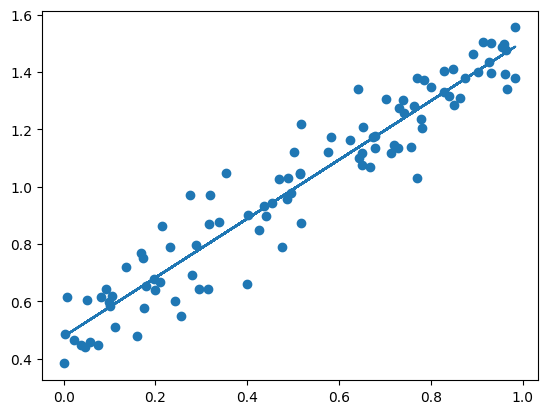

In [ ]:
y_hat = reg.predict(X)
py.scatter(x,y)
py.plot(x,y_hat)

## Pytorch:  A doorway to more advanced techniques

> PyTorch enables fast, flexible experimentation and efficient production through a user-friendly front-end, distributed training, and ecosystem of tools and libraries.

https://pytorch.org/

https://pytorch.org/tutorials/

https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [ ]:
import torch
from torch.autograd import Variable


In [ ]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Generate data
number_of_points = 100
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [ ]:
x_train = x.reshape(-1,1).astype(np.float32)
y_train = y.reshape(-1,1).astype(np.float32)

In [ ]:
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 1000

In [ ]:
model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
loss_list = []
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    loss_list += [loss.item()]

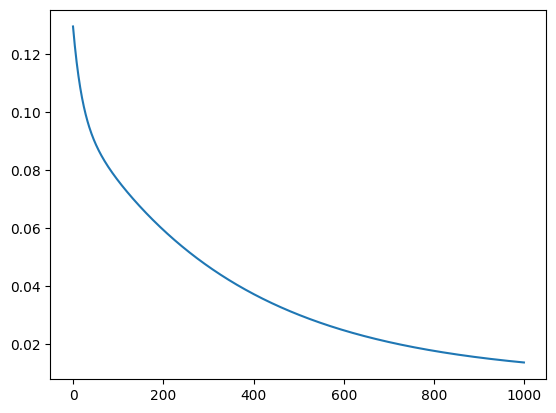

In [ ]:
py.plot(loss_list)

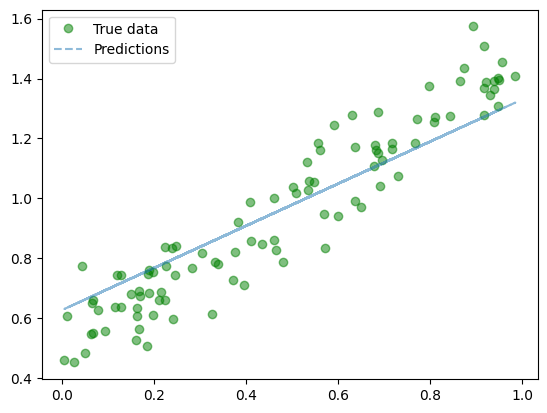

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()